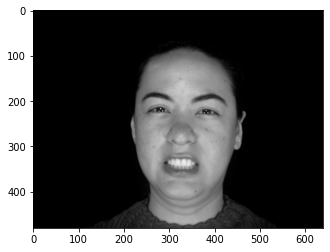

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DIRDATA = "./todaslascaras"
CATEGORIES = ["anger", "disgust", "fear", "happy", "joy", "kiss", "neutral", "sadness", "surprise"]

for category in CATEGORIES:
    path = os.path.join(DIRDATA, category) #Este es el path que me lleva al directorio de cada clase
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # tomo el path absoluto a cada img y la convieto a escala de grises
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


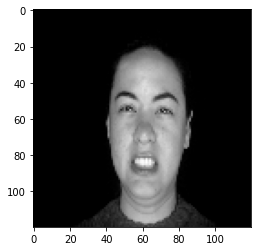

In [2]:
IMG_SIZE = 120

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap="gray")
plt.show()

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIRDATA, category) #Este es el path que me lleva al directorio de cada clase
        class_num = CATEGORIES.index(category) #Le asigno un valor numerico a cada clase
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # tomo el path absoluto a cada img y la convieto a escala de grises
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num]) #Guardo cada imagen redimensionada, en formato de arreglo junto con la clase a la que pertenece

create_training_data()

In [4]:
print(len(training_data))

347


##### Ahora como paso importante es mezclar los datos, para que cuando se entrene la cnn no tome como primeros datos todos de la misma clase

In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

2
7
6
3
0
6
6
6
5
0


In [7]:
X = [] #datos de entrenamiento
Y = [] #clases

In [8]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # El 1 es xq es gris
Y = np.array(Y)

In [9]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [11]:
X[1]

array([[[ 51],
        [ 48],
        [ 45],
        ...,
        [117],
        [121],
        [116]],

       [[ 53],
        [ 50],
        [ 47],
        ...,
        [113],
        [116],
        [127]],

       [[ 50],
        [ 46],
        [ 40],
        ...,
        [106],
        [110],
        [127]],

       ...,

       [[ 82],
        [ 82],
        [ 81],
        ...,
        [ 53],
        [ 53],
        [ 53]],

       [[ 83],
        [ 83],
        [ 83],
        ...,
        [ 52],
        [ 52],
        [ 52]],

       [[ 84],
        [ 84],
        [ 83],
        ...,
        [ 52],
        [ 52],
        [ 52]]], dtype=uint8)